# Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
SEED=4242
rnd.seed(10)
SIZE=30000
ALPHA=0.03

In [ ]:
df= pd.read_csv('/content/DFORE394.csv', low_memory=False)

In [ ]:
df.columns

Index(['user_type', 'transactor_id', 'locations_count', 'total_vends',
       'Total_VDPM', 'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency', 'MostRecentWalletLoadDate',
       'MostRecentVendDate', 'FirstWalletLoadDate', 'FirstVendDate',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast30Days',
       'WalletLoad_FrequencyLast30Days', 'WalletLoadAmountLast30Days',
       'MoneyLast30Days', 'Vend_FrequencyLast60Days',
       'WalletLoad_FrequencyLast60Days', 'WalletLoadAmountLast60Days',
       'MoneyLast60Days', 'Vend_FrequencyLast90Days',
       'WalletLoad_FrequencyLast90Days', 'WalletLoadAmountLast90Days',
       'MoneyLast90Days', 'Vend_FrequencyLast120Days',
       'WalletLoad_FrequencyLast120Days', 'WalletLoadAmountLast120Days',
       'MoneyLast120Days', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days',
       'MoneyLast180Days'],
      dtype='object')

## Variables

In [ ]:
df.set_index('transactor_id', inplace= True)

In [ ]:
df['NomadFlg']= np.where(df.locations_count==1, False, True)

In [ ]:
cols= ['NomadFlg', 'AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends',
       'WalletLoad_Recency', 'Vend_Recency',
       'Vend_DaysonBook', 'WalletLoad_DaysonBook', 'Vend_FrequencyLast180Days',
       'WalletLoad_FrequencyLast180Days', 'WalletLoadAmountLast180Days']

In [ ]:
df=df.loc[np.min(df.loc[:,['AvgDaysBetweenWalletLoad', 'AvgDaysBetweenVends']]!=0, axis=1), cols]

In [ ]:
df.index

Index(['google-oauth2|112872581275891852293',
       'google-oauth2|116615156989069358636',
       'apple|001068.a4da174bb39a423c81f5d381f3593692.2155',
       'google-oauth2|109966030683590479063', 'auth0|620fc4bd64ce69006fd438e0',
       'auth0|61bfdb43fdd15e0069358a6e', 'auth0|6170a1ac07a59e0077363ae7',
       'apple|000653.444b453001504c438c9557171d6b93c7.0009',
       'apple|000521.8917dd8ff3f04af3b381fdd91f11ff4f.1936',
       'apple|001059.598ccdb81ec34af08239d471e6cabee8.1848',
       ...
       'auth0|60f831973953db0069d5a464', 'google-oauth2|102239660070896252322',
       'apple|002021.dbd16e07c2654d03b16a982238edee0d.2353',
       'auth0|620d743538eba50068ea9209', 'google-oauth2|103589794464085853848',
       'auth0|6202c9c0c296ad0069c3ed30', 'google-oauth2|117191895617623899585',
       'google-oauth2|103636639685974989195', 'auth0|61fc9746cc6dfb006c610b41',
       'apple|001741.bd78228dc6ae4da88125dea65271846f.2039'],
      dtype='object', name='transactor_id', length=1164

In [ ]:
fl=df[cols[1:]] < df[cols[1:]].quantile(.95)

In [ ]:
df1= df.loc[fl.min(axis=1)]

In [ ]:
df1.describe()

,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
count,85211.000000,85211.00000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000,85211.000000
mean,11.221532,2.62452,20.283050,14.431435,76.113014,54.366572,31.299128,4.724073,12.420421
std,6.708749,1.54486,20.664399,18.308463,45.763788,38.803662,19.842309,2.663832,18.877639
min,1.000000,1.00000,0.000000,0.000000,3.000000,3.000000,2.000000,1.000000,0.000000
25%,6.000000,1.00000,6.000000,3.000000,39.000000,25.000000,16.000000,3.000000,0.000000
50%,10.000000,2.00000,14.000000,7.000000,67.000000,44.000000,26.000000,4.000000,0.000000
75%,15.000000,3.00000,27.000000,17.000000,106.000000,73.000000,42.000000,6.000000,20.000000
max,33.000000,7.00000,112.000000,99.000000,213.000000,188.000000,104.000000,13.000000,89.750000


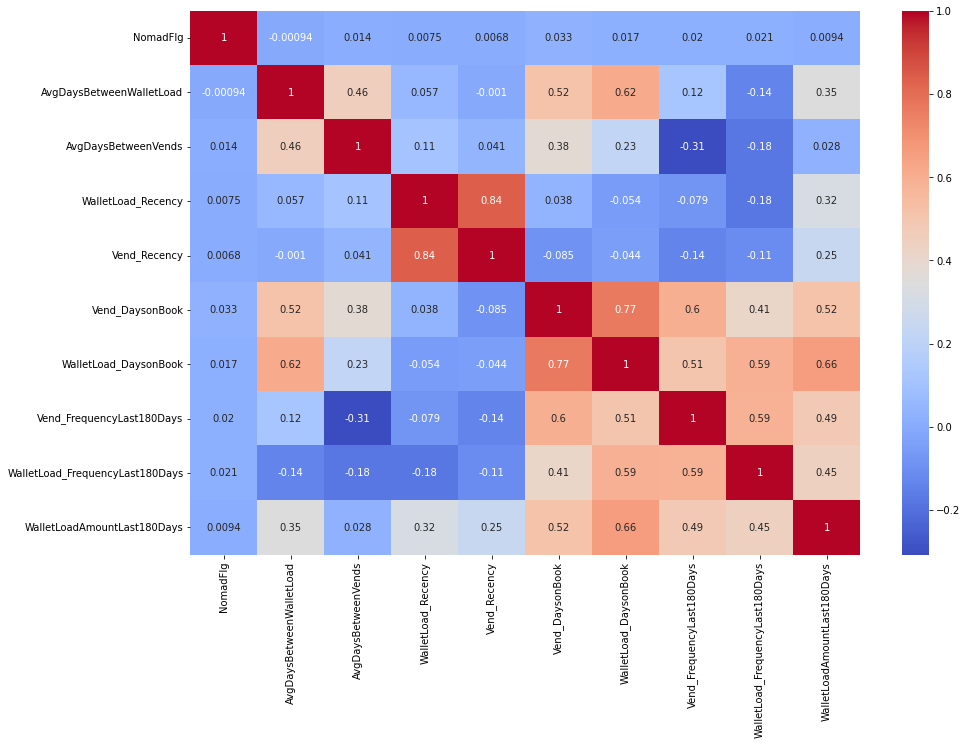

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), fmt='.2g',cmap='coolwarm', annot= True)

In [ ]:
df1.head()

,NomadFlg,AvgDaysBetweenWalletLoad,AvgDaysBetweenVends,WalletLoad_Recency,Vend_Recency,Vend_DaysonBook,WalletLoad_DaysonBook,Vend_FrequencyLast180Days,WalletLoad_FrequencyLast180Days,WalletLoadAmountLast180Days
transactor_id,,,,,,,,,,
google-oauth2|112872581275891852293,False,32,6,53,52,132,131,19,3,30.0
google-oauth2|116615156989069358636,False,9,2,0,0,66,66,34,7,5.0
apple|001068.a4da174bb39a423c81f5d381f3593692.2155,False,22,3,3,2,183,182,69,7,50.0
google-oauth2|109966030683590479063,False,8,2,21,21,92,52,50,6,20.0
auth0|620fc4bd64ce69006fd438e0,False,9,1,15,3,31,19,24,2,0.0


# K Means Modeling

In [ ]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)
Sum_of_squared_distances = []
silhouette_avg=[]
K = range(1,15)
for ALPHA in [.035]:
  for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    cluster_labels = km.labels_
    Sum_of_squared_distances.append(km.inertia_)
    minIdx= np.argmin(np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+ ALPHA*np.array([i+1 for i in range(len(Sum_of_squared_distances))]))
    print(ALPHA, minIdx)
    kSelect= K[minIdx]

0.035 0
0.035 1
0.035 2
0.035 3
0.035 4
0.035 5
0.035 5
0.035 5
0.035 5
0.035 5
0.035 5
0.035 5
0.035 5
0.035 5


In [ ]:
km = KMeans(n_clusters=4)
km = km.fit(data_transformed)
cluster_labels = km.labels_
silHSc= silhouette_score(data_transformed, cluster_labels)
iNertia= km.inertia_

In [ ]:
pca = PCA(n_components=2)
pca.fit(data_transformed)


PCA(n_components=2)

In [ ]:
df1['cluster']= cluster_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+ ALPHA*np.array([i+1 for i in range(len(Sum_of_squared_distances))])

array([1.03      , 0.79548385, 0.70340049, 0.6503002 , 0.61950713,
       0.61031081, 0.61624695, 0.62898612, 0.64281634, 0.6587647 ,
       0.6721252 , 0.69033631, 0.70619686, 0.72476094])

In [ ]:
Sum_of_squared_distances

[35074.61568004562,
 25796.813544544817,
 21514.78658355694,
 18600.075820481485,
 16467.782008413345,
 15092.986288925364,
 14248.95559600135,
 13643.538683896095,
 13076.389891910643,
 12583.534025089475,
 11999.90979686782,
 11586.419049181271,
 11090.483400840374,
 10689.372786987235]

In [ ]:
def cluster_harness(df2, ALPHA):
  mms = MinMaxScaler()
  mms.fit(df2)
  data_transformed = mms.transform(df2)
  Sum_of_squared_distances = []
  silhouette_avg=[]
  K = range(1,15)
  for k in K:
      km = KMeans(n_clusters=k)
      km = km.fit(data_transformed)
      cluster_labels = km.labels_
      Sum_of_squared_distances.append(km.inertia_)
      minIdx= np.argmin(np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+ ALPHA*np.array([i+1 for i in range(len(Sum_of_squared_distances))]))
      kSelect= K[minIdx]
  km = KMeans(n_clusters=kSelect)
  km = km.fit(data_transformed)
  cluster_labels = km.labels_
  silHSc= silhouette_score(data_transformed, cluster_labels)
  iNertia= km.inertia_
  return([kSelect, cluster_labels, silHSc,iNertia, km])
    # silhouette_avg.append(silhouette_score(data_transformed, cluster_labels))

In [ ]:
result= cluster_harness(df1, .3)

ValueError: ignored

In [ ]:
result[0]

2

# Earlier Work

In [ ]:
# df1.describe(percentiles=[.05,.95])

In [ ]:
# df1.columns

In [ ]:
len(df1.transactor_id.unique())

116450

In [ ]:
train= df1.sample(frac=.2, replace=False, random_state=4242)

In [ ]:
test= df1.sample(frac=.2, replace=False, random_state=4242)

In [ ]:
# list(train.index)

In [ ]:
for i in range(1000):
  for N in [4,5]:
    df2=df1.sample(n=N, axis=1)
    result= cluster_harness(df2)

KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: ignored

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


In [ ]:
ftr

['WalletLoadAmountLast90Days',
 'WalletLoad_FrequencyLast90Days',
 'MoneyLast30Days',
 'Vend_FrequencyLast90Days',
 'MoneyLast90Days']

In [ ]:
cluster_labels

array([0, 0, 2, ..., 1, 0, 3], dtype=int32)

In [ ]:
np.array([i+1 for i in range(len(Sum_of_squared_distances))])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
ScaldIntertia= np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+ 0.02*np.array([i+1 for i in range(len(Sum_of_squared_distances))])

In [ ]:
np.argmin(np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+ np.array([i+1 for i in range(len(Sum_of_squared_distances))])**2)

0

In [ ]:
cluster_labels

array([ 8,  3,  5, ..., 13,  0,  1], dtype=int32)

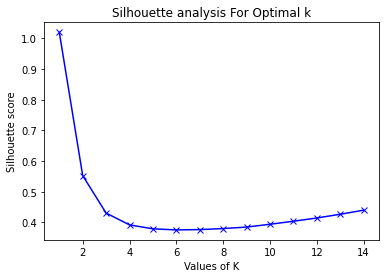

In [ ]:
plt.plot(K,ScaldIntertia, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Scrap

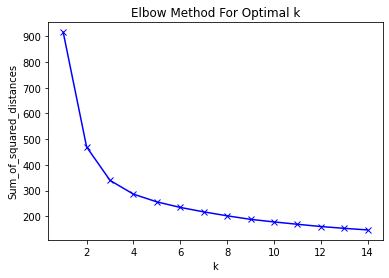

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
f_xx= np.diff(Sum_of_squared_distances,2)

In [ ]:
f_xx

array([76.6978693 , 23.47112086,  8.48828406,  4.23032966,  2.08646589,
        1.45628268,  3.78314935,  0.84783191,  0.53766322,  1.54208436,
        0.93777171])

In [ ]:
first_diff=[]
for i in range(len(Sum_of_squared_distances)):
  # print((Sum_of_squared_distances[i+1]- Sum_of_squared_distances[i])/ Sum_of_squared_distances[i])
  first_diff.append(((Sum_of_squared_distances[i]- Sum_of_squared_distances[len(Sum_of_squared_distances)-1])/Sum_of_squared_distances[len(Sum_of_squared_distances)-1]))

In [ ]:
first_diff

[2.203754260638337,
 1.3153682369952595,
 0.9501045075093425,
 0.7449269277724735,
 0.5976441849047259,
 0.479214652375337,
 0.3750159822344172,
 0.280749973136728,
 0.2122871549843739,
 0.1496070238727017,
 0.0905940561009992,
 0.04209896472379138,
 0.0]

In [ ]:
from numpy.lib.function_base import diff
second_diff=[]
for i in range(len(Sum_of_squared_distances)-2):
  second_diff.append((first_diff[i+1]- first_diff[i])/first_diff[i])

In [ ]:
len(first_diff)

13

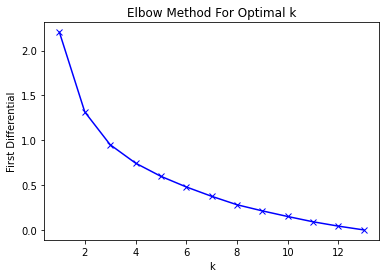

In [ ]:
plt.plot(range(1,14), first_diff, 'bx-')
plt.xlabel('k')
plt.ylabel('First Differential')
plt.title('Elbow Method For Optimal k')
plt.show()

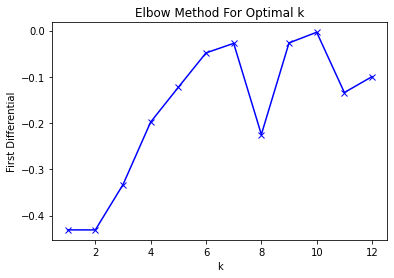

In [ ]:
plt.plot(range(1,13), second_diff, 'bx-')
plt.xlabel('k')
plt.ylabel('First Differential')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
second_diff

[-0.43103320057262967,
 -0.4310905253462688,
 -0.3331065668023461,
 -0.1976835693126149,
 -0.12247912585631632,
 -0.048167947960102854,
 -0.027520548154127147,
 -0.22473768302455668,
 -0.026550317422174643,
 -0.0034915956351709615,
 -0.13392098760818652,
 -0.09952473143392487]